# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Начало работы. Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 7)})

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv',\
                    index_col='date', parse_dates=['date'])
test = pd.read_csv('/datasets/gold_recovery_test.csv',\
                   index_col='date', parse_dates=['date'])
full = pd.read_csv('/datasets/gold_recovery_full.csv',\
                   index_col='date', parse_dates=['date'])

In [3]:
# выводим на экран краткую информацию с общим видом таблицы
display(full.head())
display(test.head())
display(train.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
def nan_count(df):
    """
    функция на вход принимает DataFrame для подсчёта пропусков в столбцах.
    на выход функция возвращает таблицу с процентом и колличеством пропусков
    в столбцах.
    """
    a = pd.concat([df.isna().sum().sort_values(ascending=False) / len(df),\
        df.isna().sum().sort_values(ascending=False)], axis=1, keys=['percent', 'count'])
    
    return a

In [5]:
# посмотрим на пропуски в наших таблицах
display(nan_count(train).head())
display(nan_count(test).head())
display(nan_count(full).head())

,percent,count
rougher.output.recovery,0.152610,2573
rougher.output.tail_ag,0.133452,2250
rougher.output.tail_sol,0.133393,2249
rougher.output.tail_au,0.133393,2249
secondary_cleaner.output.tail_sol,0.117794,1986


,percent,count
rougher.input.floatbank11_xanthate,0.060280,353
primary_cleaner.input.sulfate,0.051571,302
primary_cleaner.input.depressant,0.048497,284
rougher.input.floatbank10_sulfate,0.043887,257
primary_cleaner.input.xanthate,0.028347,166


,percent,count
rougher.output.recovery,0.137304,3119
rougher.output.tail_ag,0.120488,2737
rougher.output.tail_sol,0.120444,2736
rougher.output.tail_au,0.120444,2736
rougher.input.floatbank11_xanthate,0.099357,2257


Во всех выборках присутствуют пропуски. В обучающей выборке доля пропусков большая, нужно постараться их как-то заполнить.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Данные на базе)

# Проверка расчёта эффективности обогащения

In [6]:
# сохраним в переменные столбцы, которые будем использовать
# для проверки расчёта эффективности обогащения
c, f, t = train['rougher.output.concentrate_au'],\
    train['rougher.input.feed_au'], train['rougher.output.tail_au']

# сохраним в переменную наш расчёт recovery
rec = ((c * (f - t)) / (f * (c - t)) * 100)
# во время теста функции получились критично большие значения
# чтобы избежать ошибки с расчётом MAE переведём критичные значения
# в NAN'ы
rec[rec < 0] = np.nan
rec[rec > 100] = np.nan

# сохраним исходные данные в переменную
default = train['rougher.output.recovery']

# MAE
mae = mean_absolute_error(default.fillna(0), rec.fillna(0))

print('Default:\n{}\nRecovery:\n{}\nMAE: {}'\
      .format(default.describe(), rec.describe(), mae))

Default:
count    14287.000000
mean        82.394201
std         15.096808
min          0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: rougher.output.recovery, dtype: float64
Recovery:
count    14287.000000
mean        82.394201
std         15.096808
min         -0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
dtype: float64
MAE: 8.00350954615662e-15


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


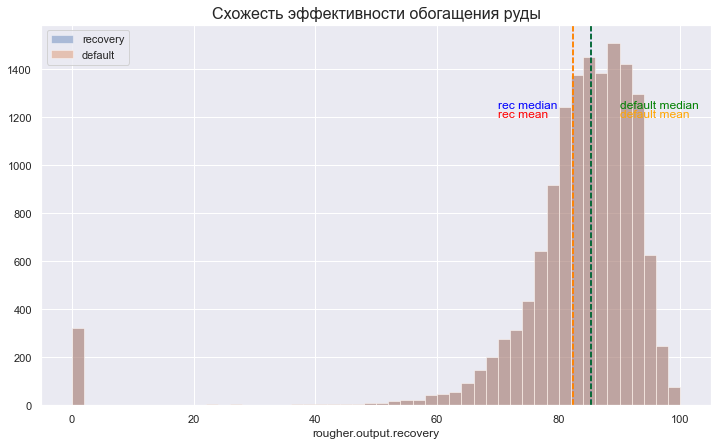

In [7]:
# сделаем визуализацию данных
plt.axvline(rec.mean(), linestyle='--', color='red');
plt.text(x=70, y=1200, s='rec mean', fontsize=12, color='red');
plt.axvline(rec.median(), linestyle='--', color='blue');
plt.text(x=70, y=1235, s='rec median', fontsize=12, color='blue');
plt.axvline(default.mean(), linestyle='--', color='orange');
plt.text(x=90, y=1200, s='default mean', fontsize=12, color='orange');
plt.axvline(default.median(), linestyle='--', color='green');
plt.text(x=90, y=1235, s='default median', fontsize=12, color='green');
ax = sns.distplot(rec, kde=False, label='recovery');
ax = sns.distplot(default, kde=False, label='default');
plt.title('Схожесть эффективности обогащения руды', fontsize=16)
plt.legend();
plt.show()

Наш расчёт эффективности совпадает с исходным расчётом. Присутствуют аномальные значения.\
Нужно сделать хорошую предобрабокту!

# Предобработка данных

In [8]:
# посмотрим каких столбцов нет в тестовой выборке
set(train) - set(test)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке нет целевых признаков. Придется вытягивать из полной таблицы. Так же в тестовой выборке\
нет столбцов вторичной очистки. Скорее всего эти данные стали доступны после того как тыстовая выборка была сформирована.\
Сейчас нужно привести обучающую выборку в порядок! Удалить из неё все столбцы, которых нет в тесте и подтянуть целевые признаки\
из полной таблицы.

In [9]:
# вытаскиваем из полной таблицы целевые признаки в тестовую выборку
test = test.join(full[['rougher.output.recovery', 'final.output.recovery']], on='date')

# удаляем из обучающей выборки столбцы, которых нет в тестовой
train = train[test.columns]

# выводим размер таблиц
test.shape, train.shape

((5856, 54), (16860, 54))

Размеры таблиц сходятся. Вернёмся к пропускам

In [10]:
display(nan_count(train).head())
display(nan_count(test).head())
display(nan_count(full).head())

,percent,count
rougher.output.recovery,0.152610,2573
rougher.input.floatbank11_xanthate,0.112930,1904
final.output.recovery,0.090214,1521
primary_cleaner.input.sulfate,0.077521,1307
primary_cleaner.input.depressant,0.074852,1262


,percent,count
rougher.output.recovery,0.093238,546
final.output.recovery,0.075478,442
rougher.input.floatbank11_xanthate,0.060280,353
primary_cleaner.input.sulfate,0.051571,302
primary_cleaner.input.depressant,0.048497,284


,percent,count
rougher.output.recovery,0.137304,3119
rougher.output.tail_ag,0.120488,2737
rougher.output.tail_sol,0.120444,2736
rougher.output.tail_au,0.120444,2736
rougher.input.floatbank11_xanthate,0.099357,2257


Есть идея заполнить пропуски интерполяцией с методом time

In [11]:
test = test.interpolate(method='time')
train = train.interpolate(method='time')
full = full.interpolate(method='time')

display(nan_count(train).head())
display(nan_count(test).head())
display(nan_count(full).head())

,percent,count
final.output.recovery,0.0,0
rougher.input.feed_pb,0.0,0
rougher.state.floatbank10_b_air,0.0,0
rougher.state.floatbank10_a_level,0.0,0
rougher.state.floatbank10_a_air,0.0,0


,percent,count
final.output.recovery,0.0,0
rougher.input.feed_pb,0.0,0
rougher.state.floatbank10_b_air,0.0,0
rougher.state.floatbank10_a_level,0.0,0
rougher.state.floatbank10_a_air,0.0,0


,percent,count
secondary_cleaner.state.floatbank6_a_level,0.0,0
rougher.calculation.floatbank11_sulfate_to_au_feed,0.0,0
primary_cleaner.state.floatbank8_b_air,0.0,0
primary_cleaner.state.floatbank8_b_level,0.0,0
primary_cleaner.state.floatbank8_c_air,0.0,0


Сейчас мы вытащили нужные признаки в тестовую выборку и избавились от ненужных признаков из обучающей. Избавились от пропусков в выборках.\
Можно приступать к анализу данных

# Анализ данных

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

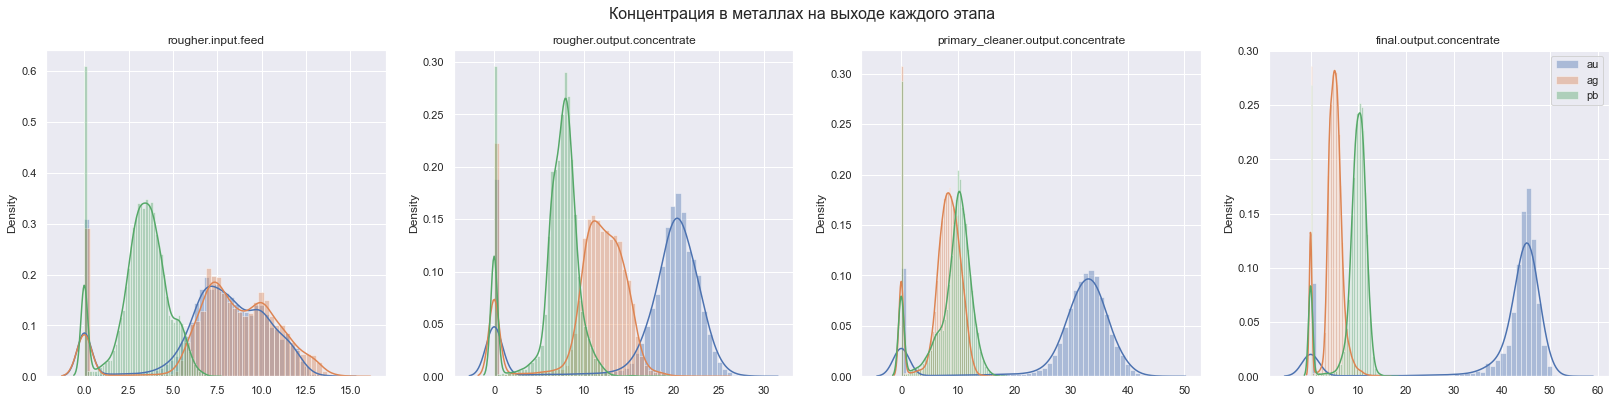

In [12]:
processing = ['rougher.input.feed',
              'rougher.output.concentrate',
              'primary_cleaner.output.concentrate',
              'final.output.concentrate']

metals = ['au', 'ag', 'pb']

fig, axs = plt.subplots(1, 4, figsize=(28, 6))
fig.suptitle('Концентрация в металлах на выходе каждого этапа', fontsize=16)

for stage, ax in zip(processing, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = full.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(full.loc[:, cols], label=metal, ax=ax)    
plt.legend()
plt.show()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

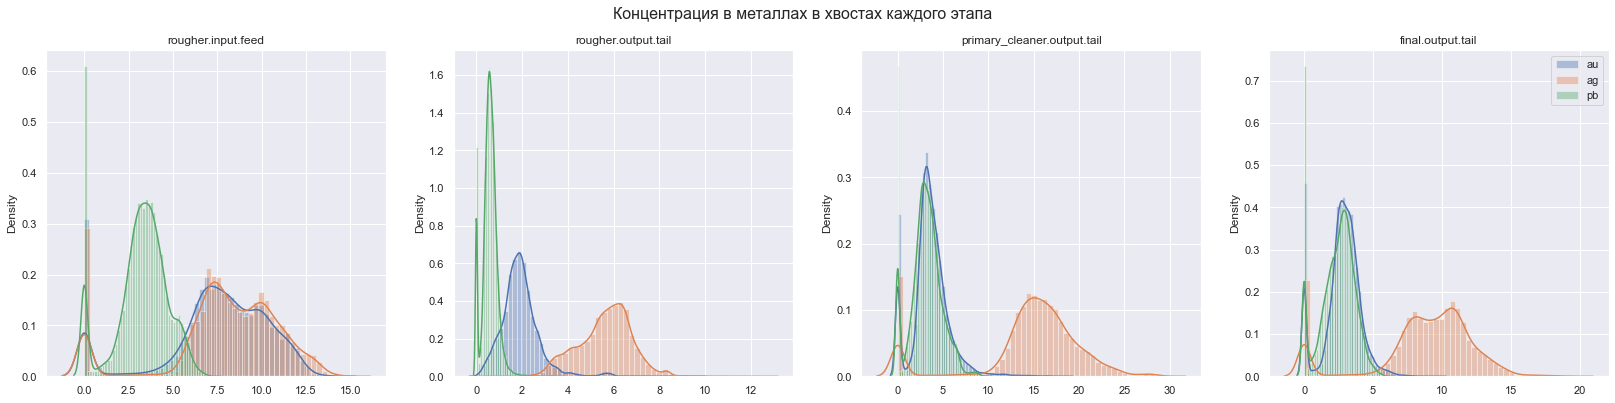

In [13]:
processing_tail = ['rougher.input.feed',
                   'rougher.output.tail',
                   'primary_cleaner.output.tail',
                   'final.output.tail']

fig, axs = plt.subplots(1, 4, figsize=(28, 6))
fig.suptitle('Концентрация в металлах в хвостах каждого этапа', fontsize=16)

for stage, ax in zip(processing_tail, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = full.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(full.loc[:, cols], label=metal, ax=ax)   
plt.legend()
plt.show()

Концетрация металлов на выходе увеличивается с каждым этапом обработки.\
В отвальных хвостах концетрация металлов небольшая.

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


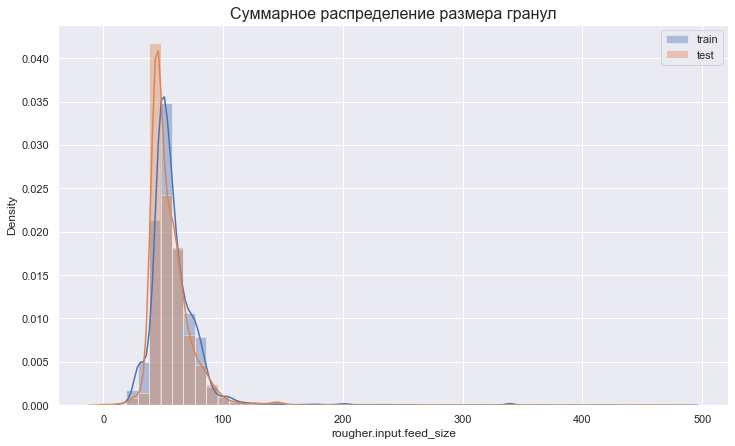

In [14]:
sns.distplot(train['rougher.input.feed_size'], label='train')
sns.distplot(test['rougher.input.feed_size'], label='test')
plt.title('Суммарное распределение размера гранул', fontsize=16)
plt.legend()
plt.show()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

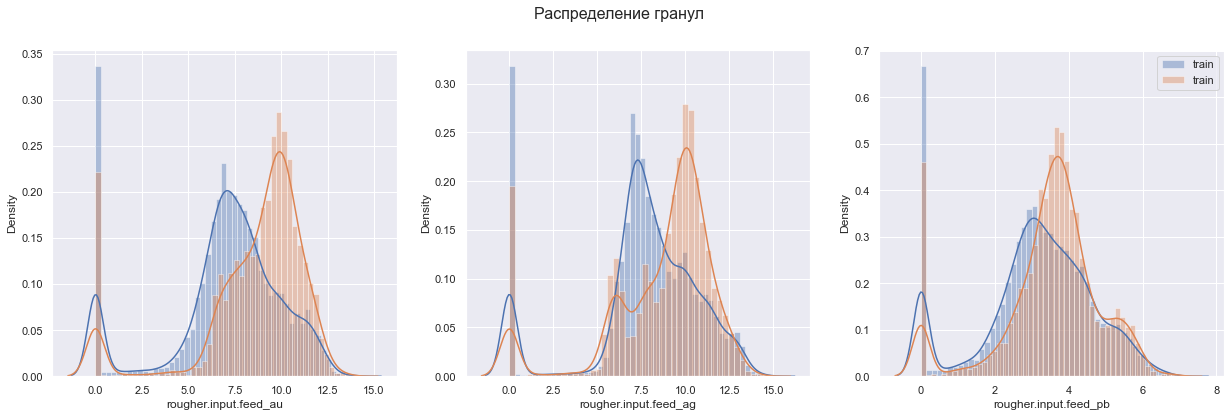

In [15]:
lst = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
]

labels = ['train', 'test']

fig, axs = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Распределение гранул', fontsize=16)

for name, ax in zip(lst, axs):
    sns_ax = sns.distplot(train[name], label=labels, ax=ax)
    sns_ax = sns.distplot(test[name], label=labels, ax=ax)    
plt.legend()
plt.show()

Обучающая и схожая выборка схожи. Стоит отметить присутствие аномальных значений.\
От них мы избавимся

In [16]:
train = train[(train['rougher.input.feed_au'] > 0) &
              (train['rougher.input.feed_ag'] > 0) &
              (train['rougher.input.feed_pb'] > 0)]

test = test[(test['rougher.input.feed_au'] > 0) &    
            (test['rougher.input.feed_ag'] > 0) &  
            (test['rougher.input.feed_pb'] > 0)]

train.shape, test.shape

((15647, 54), (5485, 54))

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

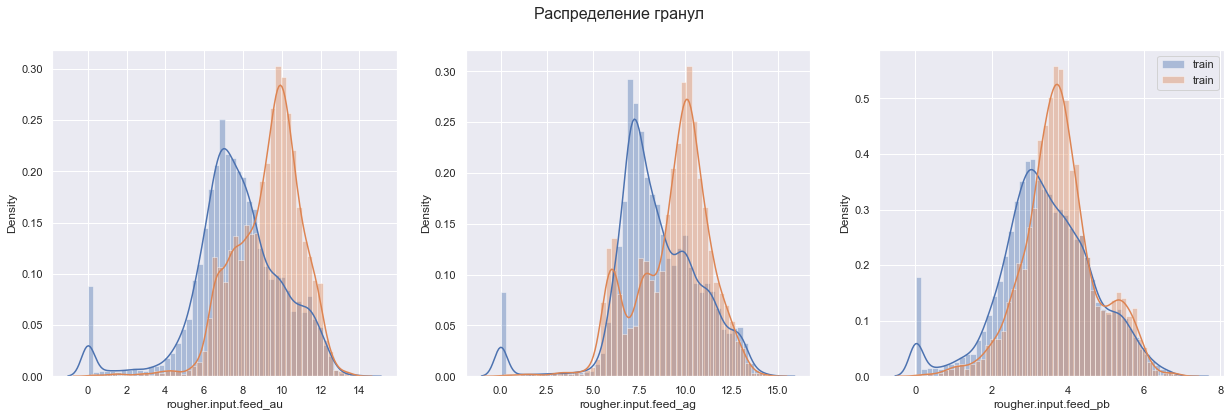

In [17]:
lst = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
]

labels = ['train', 'test']

fig, axs = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Распределение гранул', fontsize=16)

for name, ax in zip(lst, axs):
    sns_ax = sns.distplot(train[name], label=labels, ax=ax)
    sns_ax = sns.distplot(test[name], label=labels, ax=ax)    
plt.legend()
plt.show()

На данном этапе мы избавились от аномальных значений в обучающей и тестовой выборках. 

# Модель

In [18]:
X_train = train.drop(['final.output.recovery', 'rougher.output.recovery'], axis='columns')
X_test = test.drop(['final.output.recovery', 'rougher.output.recovery'], axis='columns')

Y_train_rougher = train['rougher.output.recovery']
Y_train_cleaner = train['final.output.recovery']

Y_test_rougher = test['rougher.output.recovery']
Y_test_cleaner = test['final.output.recovery']

# посмотрим размеры получившихся выборок
print('Rougher:')
print('X_train, Y_train, X_test, Y_test')
print(X_train.shape, Y_train_rougher.shape, X_test.shape, Y_test_rougher.shape)
print('Cleaner:')
print('X_train, Y_train, X_test, Y_test')
print(X_train.shape, Y_train_cleaner.shape, X_test.shape, Y_test_cleaner.shape)

Rougher:
X_train, Y_train, X_test, Y_test
(15647, 52) (15647,) (5485, 52) (5485,)
Cleaner:
X_train, Y_train, X_test, Y_test
(15647, 52) (15647,) (5485, 52) (5485,)


Я делал лишние разбивки! :)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


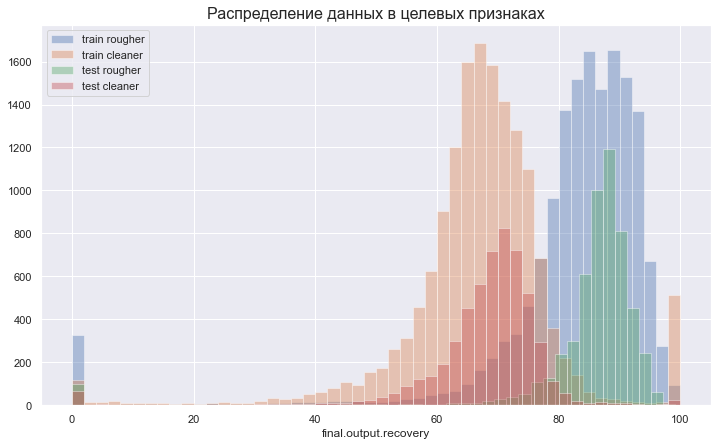

In [19]:
sns.distplot(Y_train_rougher, kde=False, label='train rougher')
sns.distplot(Y_train_cleaner, kde=False, label='train cleaner')
sns.distplot(Y_test_rougher, kde=False, label='test rougher')
sns.distplot(Y_test_cleaner, kde=False, label='test cleaner')
plt.title('Распределение данных в целевых признаках', fontsize=16)
plt.legend()
plt.show()

In [20]:
# в этой ячейке сохраним сразу две функции расчёта
# smape и final smape
# smape()
def smape(y, pred):
    return 100 / len(y) * np.sum(2 * np.abs(pred - y) / (np.abs(y) + np.abs(pred)))


smape_score = make_scorer(smape, greater_is_better=False)

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
state = 42

cv = KFold()

pipe = Pipeline([('model', RandomForestRegressor(random_state=state))])

param_grid = [
    {
        'model': [RandomForestRegressor(random_state=state)],
        'model__max_depth': [3, 6, 9],
        'model__n_estimators': [20, 50, 100],
    }, {
        'model': [DecisionTreeRegressor(random_state=state)],
        'model__max_depth': [3, 6, 9],
    }, {
        'model': [LinearRegression()],
    }
]

In [23]:
%%time
grid_rougher = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=cv, scoring=smape_score, n_jobs=-1)
grid_rougher.fit(X_train, Y_train_rougher)

Wall time: 2min 43s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestRegressor(max_depth=3,
                                                          n_estimators=50,
                                                          random_state=42)],
                          'model__max_depth': [3, 6, 9],
                          'model__n_estimators': [20, 50, 100]},
                         {'model': [DecisionTreeRegressor(random_state=42)],
                          'model__max_depth': [3, 6, 9]},
                         {'model': [LinearRegression()]}],
             scoring=make_scorer(smape, greater_is_better=False))

In [24]:
display(grid_rougher.best_estimator_)
display(grid_rougher.best_params_)
display(grid_rougher.best_score_)

Pipeline(steps=[('model',
                 RandomForestRegressor(max_depth=3, n_estimators=50,
                                       random_state=42))])

{'model': RandomForestRegressor(max_depth=3, n_estimators=50, random_state=42),
 'model__max_depth': 3,
 'model__n_estimators': 50}

-12.650837408151949

# Finish

# Rougher

In [25]:
model = RandomForestRegressor(max_depth=3, n_estimators=50, random_state=state)

# rougher
model.fit(X_train, Y_train_rougher)
predict_rougher = model.predict(X_test)
predict_rougher

array([84.1812625 , 84.1812625 , 84.1812625 , ..., 84.35931171,
       84.35931171, 84.54438836])

In [26]:
dummy_regr = DummyRegressor(strategy='median')

# rougher
dummy_regr.fit(X_train, Y_train_rougher)
dummy_predict_rougher = dummy_regr.predict(X_test)
smape_dummy_rougher = smape(Y_test_rougher, dummy_predict_rougher)
smape_dummy_rougher

9.040182324377426

In [27]:
# rougher
smape_rougher = smape(Y_test_rougher, predict_rougher)
smape_rougher

10.262739694085996

# Cleaner

In [28]:
# cleaner
model.fit(X_train, Y_train_cleaner)
predict_cleaner = model.predict(X_test)
predict_cleaner

array([71.26619599, 71.26619599, 71.26619599, ..., 71.26619599,
       71.26619599, 71.26619599])

In [29]:
# cleaner
dummy_regr.fit(X_train, Y_train_cleaner)
dummy_predict_cleaner = dummy_regr.predict(X_test)
smape_dummy_cleaner = smape(Y_test_cleaner, dummy_predict_cleaner)
smape_dummy_cleaner

11.079650678102263

In [30]:
smape_cleaner = smape(Y_test_cleaner, predict_cleaner)
smape_cleaner

10.539487373356655

# Final sMAPE

In [31]:
final_smape = 0.25 * smape_rougher + 0.75 * smape_cleaner
final_smape

10.47030045353899